## Intro NN con python y keras

**Keras** - API para conectar *backends* de machine learning

**backends** - Frameworks para ML: Pythorch, Tensorflow, Theano

Enlaces interesantes:
https://adamharley.com/
https://adamharley.com/nn_vis/

In [1]:
# Dataset de numeros
# https://keras.io/api/datasets/mnist/

import numpy as np
from matplotlib import pyplot as plt
from keras import layers, models
from tensorflow.keras.utils import to_categorical
from keras.datasets import mnist


In [4]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 1s 0us/step


In [11]:
train_data.shape

(60000, 28, 28)

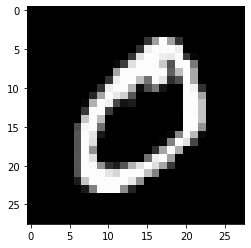

In [9]:
plt.imshow(train_data[1],cmap='gray')

In [10]:
train_labels[1]

0

Primera capa: 512 neuronas cuya entrada son las imagenes de 28x28

Segunda capa: 10 neuronas de salida, son 10 categorias (numeros del 0 a 9)

In [14]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
model.add(layers.Dense(10, activation='softmax'))

In [15]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics='accuracy')

In [16]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


Es necesario arreglar los datos para entrenar la red:
- Fully connected requiere que las matrices de iamgenes se organicen como vectores 
- Se normalizan los datos, en pixeles es sencillo ya que van de 0 a 255
- Los labels de salida se pasan de variable categorica a vector de salida e.g. '5' -> [0 0 0 0 0 1 0 0 0 0]

In [25]:
# Los datos de entrada quedan como una matriz de m (samples) x n*n datos (imagen de 28x28)
# Datos de entrenamiento
train_reshaped = train_data.reshape((train_data.shape[0],train_data.shape[1]*train_data.shape[2])) 
train_norm = train_reshaped.astype(float)/255 # 0 - 255 to 0 - 1

# Datos de prueba
test_reshaped = test_data.reshape((test_data.shape[0],test_data.shape[1]*test_data.shape[2])) 
test_norm = test_reshaped.astype(float)/255 


In [27]:
train_output = to_categorical(train_labels)
test_output = to_categorical(test_labels)

In [28]:
train_output[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

**Entrenamiento de la red:**

Se utilizan los datos de entrenamiento normalizados y los labels de salida. 

Parametros:
- epochs: Se ajsutan los pesos de la red por cada corrida, en este caso 400k, la idea es que se obtengan los valores que al tener x1 en la entrada se produzca y1 a la salida. Dado que la métrica es 'accuracy' se mide porcentaje de éxito tiene el modelo al predecir un valor. Entre mayor sea el número de epochs se espera que suba la precisión.
- batch_size:


In [32]:
model.fit(train_norm, train_output, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 1s 3ms/step - loss: 2.7621e-04 - accuracy: 1.0000
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 3.5584e-04 - accuracy: 0.9998
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 1.2176e-04 - accuracy: 1.0000
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 2.2138e-04 - accuracy: 1.0000
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 8.6494e-05 - accuracy: 1.0000


In [33]:
model.evaluate(test_norm, test_output)

313/313 [==============================] - 0s 611us/step - loss: 0.1112 - accuracy: 0.9830


[0.11123989522457123, 0.9829999804496765]

-----------------------------------------------------------------------------------------------------------

#### Funciones de activación

Umbral: 
$f(x)= 1 \ si \ x\geq 0,\ 0 \ si\ x\leq0 $
</br>

sg:
$f(x)= 1 \ si \ x\geq 0,\ -1 \ si\ x\leq0 $
</br>

Sigmoide:
$f(x)=\frac{1}{1+e^{-x}}$
</br>

tanh:
$f(x)=\frac{e^{x}+e^{-x}}{e^{x}-e^{-x}}$
</br>

reLU:
$f(x)= x \ si \ x\geq 0,\ 0 \ si\ x\leq0$


In [36]:
def sigmoid(x):
    return (1)/(1+np.exp(-x))

In [56]:
# Funcion definida a trozos
# np.piecewise(x,[x<0, x>=0],[0,1])
def step(x):
    return (x>=0).astype('float')

In [61]:
def relu(x):
    return (x+abs(x))/2

In [68]:
def relu2(x):
    return np.piecewise(x,[x<0, x>=0],[0, lambda x:x])

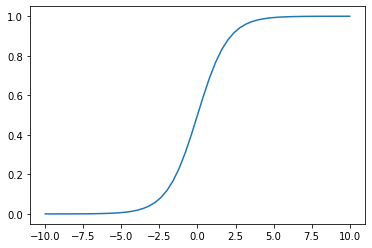

In [39]:
x = np.linspace(-10,10,51)
y = sigmoid(x)
plt.plot(x,y)

In [58]:
print(step(np.array(-10)))

0.0


In [69]:
print(relu2(np.array([-1,1,10,-4,5.5])))

[ 0.   1.  10.   0.   5.5]


**Loss function**

Mide el error entre la predicción y el valor real.

$MSE = \frac{1}{n}\sum(y-y')^2$ -> Error cuadratico medio

$Cross \, entropy = -\sum_x p(x) log (q(x))$

In [70]:
def mse(y,y_hat):
  return np.mean((y-y_hat)**2)

In [72]:
y = np.array([0,0,0.1,0.5])
y_hat = np.array([0.3, 0.2, 0.1, 0])
print(mse(y, y_hat))

0.095


**Gradient Descent**

repetir:\
  x_aux = x - diff(f(x))\
  condicion de terminación\
  x = x_aux

Se utiliza para minimizar el error de la función de pérdida y ajustar los parámetros del modelo


Ejemplo de una NN from scratch

In [2]:
from sklearn.datasets import make_gaussian_quantiles

In [3]:
# Se definen los datos se usa una distribución chi2 con labels preestablecidos
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_gaussian_quantiles.html
N = 1000
(X, Y) = make_gaussian_quantiles(
  mean=None, 
  cov=0.1, 
  n_samples=N, 
  n_features=2, 
  n_classes=2, 
  shuffle=True, 
  random_state=None)

In [79]:
X[0,:]

array([-0.05796347, -0.05335491])

In [81]:
Y[0:10]

array([0, 0, 1, 1, 0, 1, 1, 1, 1, 1])

In [4]:
Y = Y[:, np.newaxis]

In [83]:
Y.shape

(1000, 1)

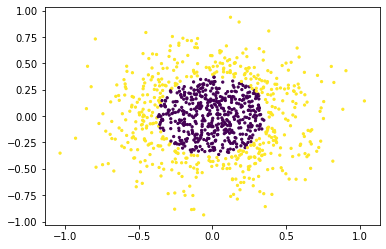

In [5]:
plt.scatter(X[:,0], X[:,1], c=Y[:], s=5)

Funciones de activación

In [6]:
def sigmoid(x, derivate=False):
  if derivate:
    return sigmoid(x)*(1-sigmoid(x))
  else:
    return (1)/(1+np.exp(-x))

def relu(x, derivate=False):
  if derivate:
    x[x<0] = 0
    x[x>=0] = x[x>=0]
    return x
  else:
    # np.maximun()
    x[x<0] = 0
    x[x>=0] = x[x>=0]
    return x


Función de pérdida

In [16]:
def mse(y,y_hat, derivate=False):
  if derivate:
    return 2*(y_hat - y)
  else: 
    return np.mean((y-y_hat)**2)

Inicialización de parametros para la NN\

De forma aleatoria se generan los valores de los pesos para cada neurona

e.g: Para una arquitectura de 2 caracteristicas - capa 1 (4 neuronas) - capa salida (1 neurona)

$[1, 2]$ * $[2,4]$ + $[1,4]$\
x1,x2 * W_L1 + b_L1 = [x1*w11+x2*w11+b11,...,x1*w41+x2*w41+b41]

$[1, 4]$ * $[4,1]$ + $[1]$


<img src='pics/NN.png' width='600'>

In [8]:
def params_init(dims):
  params = dict()
  L = len(dims)
  for l in range(0, L-1):
    params['W'+str(l+1)] = (np.random.rand(dims[l],dims[l+1])*2)-1
    params['b'+str(l+1)] = (np.random.rand(1,dims[l+1])*2)-1
  return params

In [117]:
import timeit

In [136]:
params = params_init([2,4,8,1])

In [120]:
%%timeit
np.matmul(X,params['W1'])

5.19 µs ± 106 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [121]:
%%timeit
X.dot(params['W1'])

4.62 µs ± 186 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [122]:
%%timeit
X@params['W1']

5.15 µs ± 58.8 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


Forward propagation

In [137]:
params['A0'] = X
params['Z1'] = params['A0'].dot(params['W1'])+params['b1']
params['A1'] = relu(params['Z1'])

params['Z2'] = params['A1'].dot(params['W2'])+params['b2']
params['A2'] = relu(params['Z2'])

params['Z3'] = params['A2'].dot(params['W3'])+params['b3']
params['A3'] = sigmoid(params['Z3'])
output = params['A3']

Back propagation

In [142]:
params['dZ3'] = mse(Y, output, derivate=True)*sigmoid(output,True)
params['dW3'] = params['A2'].T.dot(params['dZ3'])

params['dZ2'] = (params['dZ3'].dot(params['W3'].T))*relu(params['A2'],True)
params['dW2'] = params['A1'].T.dot(params['dZ2'])

params['dZ1'] = (params['dZ2'].dot(params['W2'].T))*relu(params['A1'],True)
params['dW1'] = params['A0'].T.dot(params['dZ1'])

Gradient decent

In [143]:
alpha = 0.001
params['W3'] = params['W3'] - params['dW3']*alpha
params['b3'] = params['b3'] - (np.mean(params['dZ3'], axis=0, keepdims=True))*alpha

params['W2'] = params['W2'] - params['dW2']*alpha
params['b2'] = params['b2'] - (np.mean(params['dZ2'], axis=0, keepdims=True))*alpha

params['W1'] = params['W1'] - params['dW1']*alpha
params['b1'] = params['b1'] - (np.mean(params['dZ1'], axis=0, keepdims=True))*alpha


In [19]:
def train_nn(x_train, y_train, params, alpha, do_train=True):
  params['A0'] = x_train
  params['Z1'] = params['A0'].dot(params['W1'])+params['b1']
  params['A1'] = relu(params['Z1'])
  params['Z2'] = params['A1'].dot(params['W2'])+params['b2']
  params['A2'] = relu(params['Z2'])
  params['Z3'] = params['A2'].dot(params['W3'])+params['b3']
  params['A3'] = sigmoid(params['Z3'])
  output = params['A3']

  if do_train:
    params['dZ3'] = mse(Y, output, derivate=True)*sigmoid(output,True)
    params['dW3'] = params['A2'].T.dot(params['dZ3'])
    params['dZ2'] = (params['dZ3'].dot(params['W3'].T))*relu(params['A2'],True)
    params['dW2'] = params['A1'].T.dot(params['dZ2'])
    params['dZ1'] = (params['dZ2'].dot(params['W2'].T))*relu(params['A1'],True)
    params['dW1'] = params['A0'].T.dot(params['dZ1'])

    params['W3'] = params['W3'] - params['dW3']*alpha
    params['b3'] = params['b3'] - (np.mean(params['dZ3'], axis=0, keepdims=True))*alpha
    params['W2'] = params['W2'] - params['dW2']*alpha
    params['b2'] = params['b2'] - (np.mean(params['dZ2'], axis=0, keepdims=True))*alpha
    params['W1'] = params['W1'] - params['dW1']*alpha
    params['b1'] = params['b1'] - (np.mean(params['dZ1'], axis=0, keepdims=True))*alpha
  return output

In [95]:
params = params_init([2,4,8,1])
errors = []
params['W1'][0]

array([-0.33153535, -0.67833811, -0.17505779, -0.79519017])

In [96]:
for _ in range(10000):
  output = train_nn(X, Y, params, 0.0001)
  error = mse(Y,output)
  if _ < 2:
    min_error = mse(Y,output)
  else: 
    if error < min_error:
      min_error_params = params
      min_error = error
  if _ % 10 == 0:
    # print(mse(Y,output))
    errors.append(mse(Y,output))

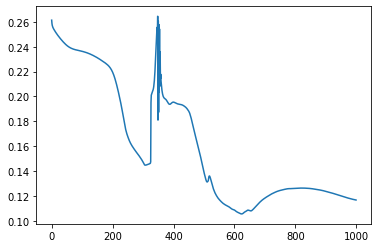

In [97]:
plt.plot(errors)

In [98]:
min_error_params == params

True

In [100]:
print(min_error,error)

0.08800269631850952 0.09121465038900047


In [101]:
data_test = (np.random.rand(1000, 2) * 2) - 1
y = train_nn(data_test, Y, min_error_params, 0.0001, do_train=False)

In [102]:
y = np.where(y >= 0.5, 1, 0)

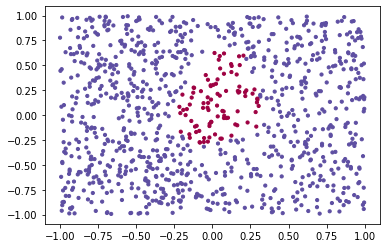

In [103]:
plt.scatter(data_test[:,0], data_test[:,1], c=y[:,0] ,s=10, cmap=plt.cm.Spectral)